(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [82]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

In [3]:
import sklearn as sk
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn import datasets
from sklearn import cluster

In [117]:
def show_clusters(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

## Kmeans

In [83]:
from sklearn.cluster import KMeans

In [8]:
# cluster.KMeans?

In [87]:
X, y = datasets.make_blobs(
    n_samples=1500,
    n_features=4,
    centers=5,
    cluster_std=0.4,
    random_state=2020
)

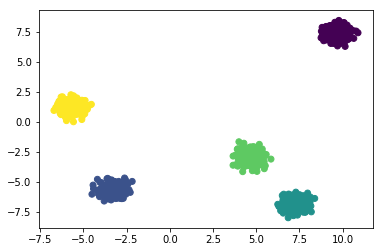

In [118]:
# plt.scatter(X[:, 0], X[: , 1], c=y)
# plt.show()
show_clusters(X, y)

In [106]:
kmeans = KMeans(n_clusters=5)

In [107]:
%%time
kmeans.fit(X)

CPU times: user 36.6 ms, sys: 3.27 ms, total: 39.8 ms
Wall time: 42.8 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
ypred = kmeans.predict(X)
np.unique(ypred)

array([0, 1, 2, 3, 4], dtype=int32)

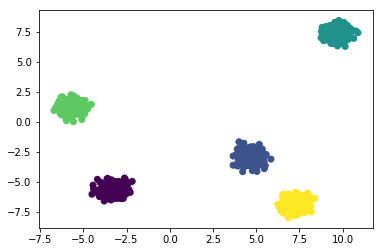

In [119]:
# plt.scatter(X[:, 0], X[: , 1], c=ypred)
# plt.show()
show_clusters(X, ypred)

In [110]:
kmeans.inertia_

941.0888416993594

### Kmeans is sensitive to the number of centroids: How to find the best K?

In [111]:
# Elbow method
ks = range(1, 11)  # number of centroids from 1 - 10
costs = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cost = kmeans.inertia_
    costs.append(cost)
    print("k={}, cost={}".format(k, cost))

k=1, cost=131611.767049
k=2, cost=69383.172863
k=3, cost=16624.826652
k=4, cost=7198.66217309
k=5, cost=941.088841699
k=6, cost=902.299187864
k=7, cost=868.448142397
k=8, cost=832.967987406
k=9, cost=795.601945437
k=10, cost=760.635922336


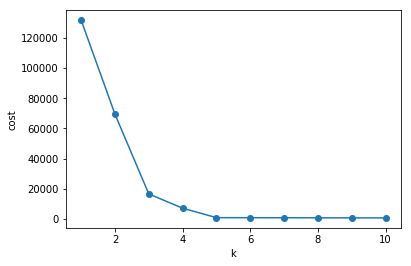

In [112]:
plt.plot(ks, costs, '-o')
plt.xlabel("k")
plt.ylabel("cost")
plt.show()

### Kmeans 对数据分布的敏感度

#### Anisotropic

In [114]:
T = np.array([[0.6, -0.636], [-0.40, 0.85]])

In [115]:
X1, y1 = datasets.make_blobs(
    n_samples=1500,
    n_features=2,
    centers=3,
    cluster_std=0.4,
    random_state=2020
)

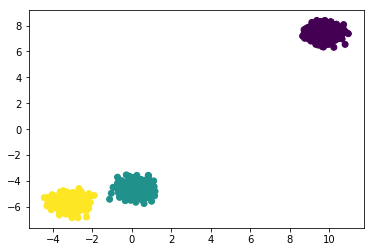

In [120]:
show_clusters(X1, y1)

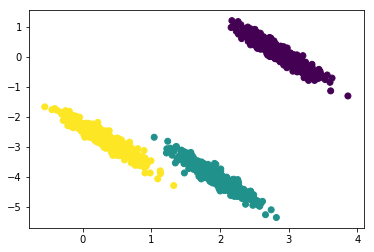

In [121]:
Xani = X1.dot(T)
yani = y1
show_clusters(Xani, yani)

In [122]:
kmeans_ani = KMeans(n_clusters=3)

In [123]:
kmeans_ani.fit(Xani)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

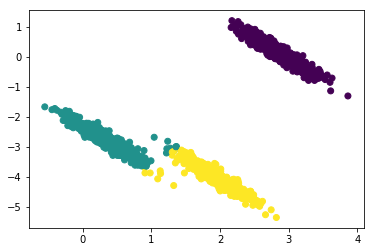

In [124]:
ypred_ani = kmeans_ani.predict(Xani)
show_clusters(Xani, ypred_ani)

#### Circle

In [125]:
Xcircle, ycircle = datasets.make_circles(n_samples=1500, factor=0.5, random_state=2020, noise=0.05)

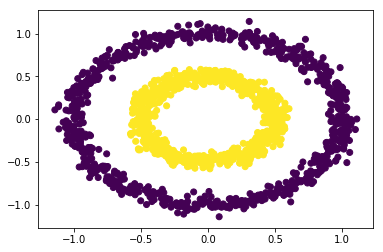

In [126]:
show_clusters(Xcircle, ycircle)

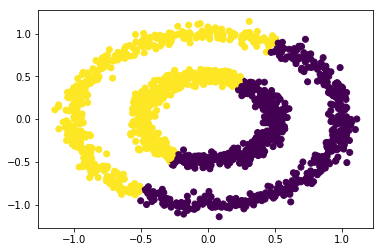

In [127]:
kmeans_circle = KMeans(n_clusters=2)
kmeans_circle.fit(Xcircle)
ypred_circle = kmeans_circle.predict(Xcircle)
show_clusters(Xcircle, ypred_circle)

## DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
# outlier detection

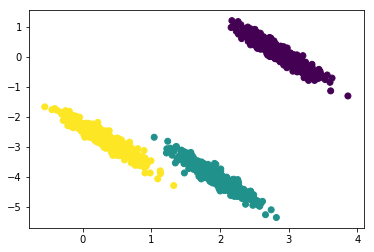

In [128]:
show_clusters(Xani, yani)

In [136]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [137]:
# fit_predict = fit + predict
ypred_db = dbscan.fit_predict(Xani)

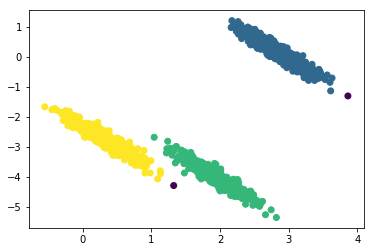

In [138]:
show_clusters(Xani, ypred_db)

In [139]:
nbrs = sk.neighbors.NearestNeighbors(n_neighbors=10)

In [140]:
nbrs.fit(Xani)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [142]:
distances, _ = nbrs.kneighbors(Xani)

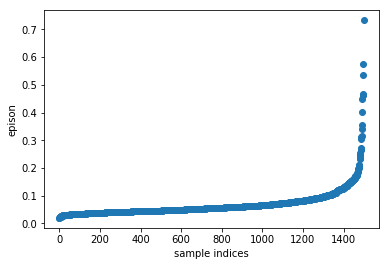

In [147]:
kdists = np.sort(distances[:, -1])
plt.plot(kdists, 'o')
plt.xlabel("sample indices")
plt.ylabel('epison')
plt.show()

### Circle data

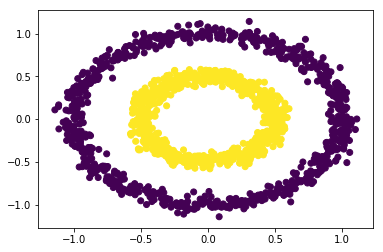

In [148]:
show_clusters(Xcircle, ycircle)

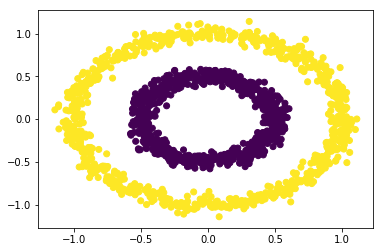

In [154]:
dbscan_circle = DBSCAN(eps=0.2, min_samples=5)
ypred_db_circle = dbscan_circle.fit_predict(Xcircle)
show_clusters(Xcircle, ypred_db_circle)

In [ ]:
# exercise: 
# 1. get kdist-graph for circle data and find optimal epison
# 2. try combinations of (epsion, minpts)

## Agglomerative clustering

In [156]:
from sklearn.cluster import AgglomerativeClustering

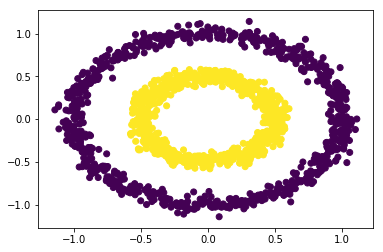

In [159]:
show_clusters(Xcircle, ycircle)

In [160]:
agg_clustering = AgglomerativeClustering(n_clusters=2)

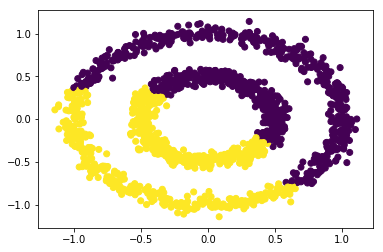

In [161]:
ypred_circle = agg_clustering.fit_predict(Xcircle)
show_clusters(Xcircle, ypred_circle)

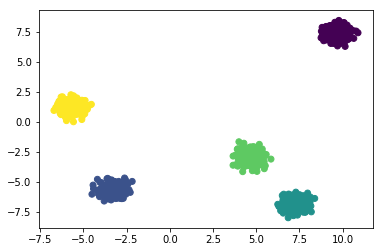

In [162]:
show_clusters(X, y)

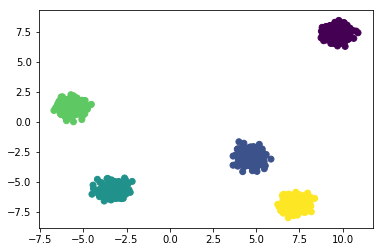

In [164]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
ypred_circle = agg_clustering.fit_predict(X)
show_clusters(X, ypred_circle)

## Gaussian Mixure

In [60]:
from sklearn import mixture

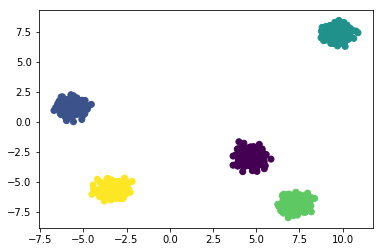

In [168]:
# Gmm on isotropic data
gmm = mixture.GaussianMixture(n_components=5)
ypred_gmm = gmm.fit_predict(X)
show_clusters(X, ypred_gmm)

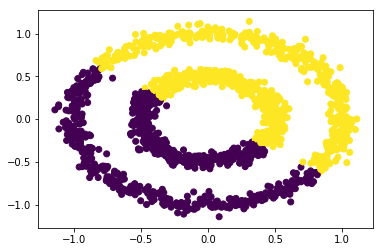

In [169]:
# Gmm on circle data
gmm = mixture.GaussianMixture(n_components=2)
ypred_gmm = gmm.fit_predict(Xcircle)
show_clusters(Xcircle, ypred_gmm)

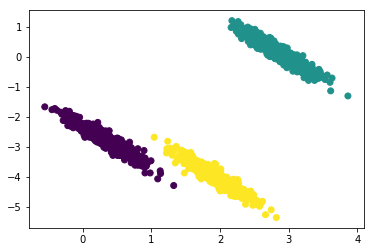

In [171]:
# Gmm on anisotropic data
gmm = mixture.GaussianMixture(n_components=3)
ypred_gmm = gmm.fit_predict(Xani)
show_clusters(Xani, ypred_gmm)

# Outlier detection



In [67]:
import gensim
from sklearn.cluster import DBSCAN

In [68]:
word2vec_fname = 'utils/GoogleNews-vectors-negative300-SLIM.bin.gz'

In [69]:
%time model = gensim.models.KeyedVectors.load_word2vec_format(fname=word2vec_fname, binary=True)

CPU times: user 22.2 s, sys: 643 ms, total: 22.8 s
Wall time: 23.7 s


In [70]:
def infer_embeddings(words):
    return [model[w] for w in words]

In [71]:
words = ["he", "she", 
         "banana", "apple", "watermelon", 
         "soccer", "football", "basketball", 
         "data"]

In [172]:
embeddings = np.asarray(infer_embeddings(words))

In [173]:
embeddings.shape

(9, 300)

In [174]:
# word distance in cosine-similarity space
model.similarity("he", "she")

0.6129949174056142

In [175]:
model.similarity("he", "data")

-0.01657462611635096

In [176]:
model.similarity("he", "banana")

0.11209037572240033

In [177]:
model.similarity("apple", "banana")

0.5318406101370754

In [178]:
model.similarity("apple", "watermelon")

0.5408666037557246

In [179]:
model.similarity("apple", "google")

0.22774799521318345

In [180]:
model.similarity("apple", "amazon")

0.19056294836578797

### DBSCAN outlier detection

In [75]:
# sk.metrics.pairwise_distances: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',  'manhattan']

In [181]:
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')

In [182]:
# X: embeddings (9, 300)
# num_samples: 9
# num_embedding: 300
labels = dbscan.fit_predict(embeddings)

In [183]:
labels

array([ 0,  0,  1,  1,  1,  2,  2,  2, -1])

In [184]:
words

['he',
 'she',
 'banana',
 'apple',
 'watermelon',
 'soccer',
 'football',
 'basketball',
 'data']

In [185]:
import collections

In [186]:
clusters = collections.defaultdict(list)
outliers = []

for word, label in zip(words, labels):
    if label != -1:
        clusters[label].append(word)
    else:
        outliers.append(word)

In [188]:
for k, v in clusters.items():
    print(k, v)

(0, ['he', 'she'])
(1, ['banana', 'apple', 'watermelon'])
(2, ['soccer', 'football', 'basketball'])


In [189]:
outliers

['data']